In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import os
import itertools


In [16]:
def find_cliques_size_k(G, k):
    i = 0
    for clique in nx.find_cliques(G):
        if len(clique) == k:
            i += 1
    return i

In [17]:
results = []

In [18]:
path = "../data/backbones/scola/"
for file in os.listdir(path):
    G = nx.from_numpy_matrix(np.load(path + file)['arr_0'], create_using = nx.Graph())
    results.append([file, G.number_of_edges(), nx.transitivity(G), nx.number_connected_components(G), find_cliques_size_k(G, 4), find_cliques_size_k(G, 8)])
    

In [19]:
r = pd.DataFrame(results, columns = ['data', 'n_edges', 'clustering_coef', 'n_connected_comp', 'n_4_cliques', 'n_8_cliques'])

In [20]:
r['date'] = pd.to_datetime(r.loc[:,'data'].str[9:17])

In [22]:
r.to_csv('tmp.csv')

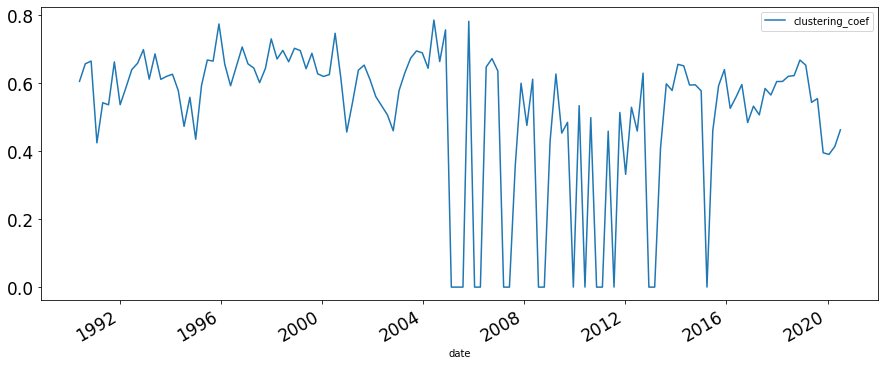

In [23]:
plt= r.plot(x='date', y='clustering_coef', figsize=(15,6))
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

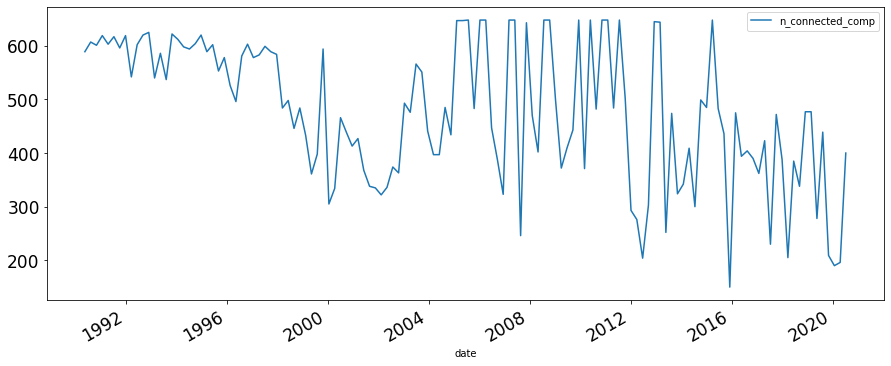

In [24]:
plt= r.plot(x='date', y='n_connected_comp', figsize=(15,6))
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

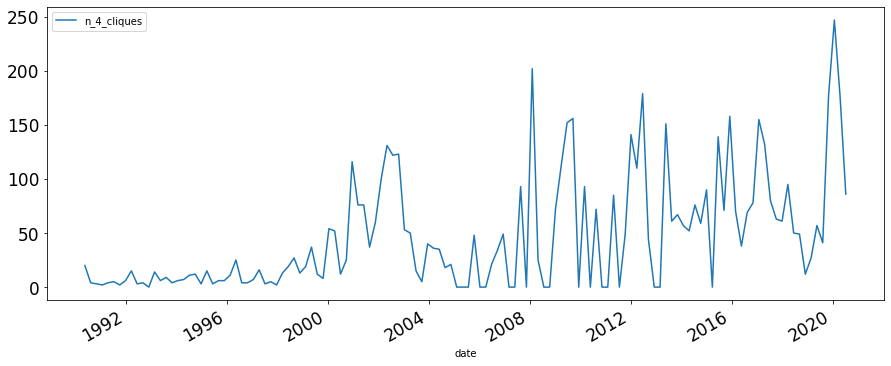

In [25]:
plt= r.plot(x='date', y='n_4_cliques', figsize=(15,6))
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

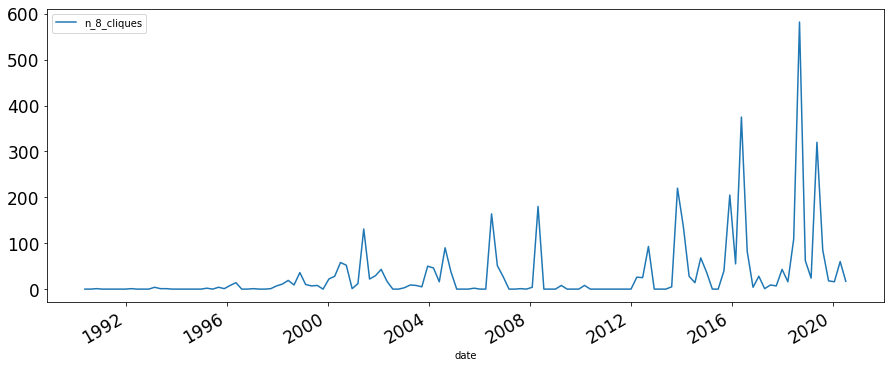

In [26]:
plt= r.plot(x='date', y='n_8_cliques', figsize=(15,6))
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

In [26]:
r.tail(20)

,data,clustering_coef,n_connected_comp,n_4_cliques,n_8_cliques,date
112,20160822_20160224.npz,0.526196,475,11442,253,2016-02-24
113,20161114_20160518.npz,0.559333,394,142775,40581,2016-05-18
114,20170206_20160810.npz,0.596188,404,186671,1683407,2016-08-10
115,20170501_20161102.npz,0.484333,390,1073,4,2016-11-02
116,20170724_20170125.npz,0.532484,362,10843,55,2017-01-25
117,20171016_20170419.npz,0.506956,423,2002,1,2017-04-19
118,20180108_20170712.npz,0.584558,230,12681,17877,2017-07-12
119,20180402_20171004.npz,0.565396,472,2193,7,2017-10-04
120,20180625_20171227.npz,0.604955,388,50095,14344,2017-12-27
121,20180917_20180321.npz,0.605320,205,96314,738622,2018-03-21
